In [2]:
library(tidyverse)
library(lubridate)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
df <- read_csv(file='final_fuzzy.csv',show_col_types=FALSE)
df <- select(df,-game_name.y,-platform.y) %>% mutate(userscore = userscore*10)
df <- df %>% mutate(genre=case_when(genre=='Up'~'Beat Em Up',
                                  genre=='D'~'3D',
                                    genre=='Fi'~'Sci-Fi',
                                    genre=='Based'~'Turn-Based',
                                    genre=='Playing'~'Role-Playing',
                                  TRUE~genre)) %>% 
mutate(year=year(release_date))
df %>% glimpse()

New names:
* `` -> ...1



Rows: 13,805
Columns: 12
$ ...1               <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, …
$ game_name.x        <chr> "007 Legends", "007 Legends", "007: Quantum of Sola…
$ platform.x         <chr> "PlayStation 3", "Xbox 360", "DS", "PC", "PlayStati…
$ release_date       <date> 2012-10-16, 2012-10-16, 2008-11-04, 2008-11-04, 20…
$ metascore          <dbl> 41, 45, 65, 70, 65, 54, 65, 51, 81, 61, 70, 46, 41,…
$ userscore          <dbl> 41, 45, NA, 63, 66, 73, 71, 50, 79, 68, 65, NA, NA,…
$ developer          <chr> "Eurocom Entertainment Software, Eurocom", "Eurocom…
$ genre              <chr> "Action", "Action", "Action", "Action", NA, "Action…
$ num_critic_reviews <dbl> 22, 49, 10, 18, NA, 11, 69, 16, 16, 11, 7, 13, 7, 1…
$ num_user_rating    <dbl> 56, 78, NA, 73, NA, 30, 90, 21, 63, 58, 15, NA, NA,…
$ sales              <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ year               <dbl> 2012, 2012, 2008, 2008, 2008, 2008, 2008, 2000, 200…


In [4]:
df %>% filter(genre=='Puzzle') %>% arrange(year)

...1,game_name.x,platform.x,release_date,metascore,userscore,developer,genre,num_critic_reviews,num_user_rating,sales,year
<dbl>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
6366,March of the Penguins,DS,2006-11-27,34,74,"Skyworks Technologies, SkyRiver Studios",Puzzle,8,27,NA,2006
6430,Mario vs. Donkey Kong 2: March of the Minis,DS,2006-09-25,76,78,"Nintendo, Nintendo Software Technology",Puzzle,32,25,1520000,2006
6160,Lucidity,PC,2009-10-07,59,48,NA,Puzzle,14,18,NA,2009
1479,Bust-A-Move Universe,3DS,2011-03-27,49,49,Arika,Puzzle,30,14,NA,2011
9561,Scribblenauts Unlimited,3DS,2012-11-13,73,77,5TH Cell,Puzzle,13,26,NA,2012
9562,Scribblenauts Unlimited,PC,2012-11-19,75,77,5TH Cell,Puzzle,14,202,1300000,2012
9563,Scribblenauts Unlimited,Wii U,2012-11-13,73,75,5TH Cell,Puzzle,42,117,NA,2012
6385,Mario and Donkey Kong: Minis on the Move,3DS,2013-05-09,78,72,Nintendo,Puzzle,41,50,NA,2013
9564,Scribblenauts Unmasked: A DC Comics Adventure,3DS,2013-09-24,68,64,5TH Cell,Puzzle,7,24,NA,2013


In [3]:
df %>% mutate(year=year(release_date)) %>%
  group_by(year,genre) %>% summarize(meta=mean(metascore,na.rm=T),user=mean(userscore,na.rm=T),n=n()) %>% filter(n>=3) %>%
  arrange(-meta) %>% slice(1) %>% print(n=30)

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



# A tibble: 27 × 5
# Groups:   year [27]
    year genre             meta  user     n
   <dbl> <chr>            <dbl> <dbl> <int>
 1  1996 Driving           92.7  85       3
 2  1997 Miscellaneous     92    76       3
 3  1998 Driving           90.2  83       4
 4  1999 Sports            89.3  80.3     3
 5  2000 Role-Playing      80.3  82      29
 6  2001 Strategy          75.8  79.4    54
 7  2002 Role-Playing      74.6  79.0    40
 8  2003 Sports            78.3  77.4   104
 9  2004 Sports            77.4  76.6    90
10  2005 Sports            76.8  74.3    81
11  2006 Sports            72.8  71.1    99
12  2007 Sports            72.0  69.7    85
13  2008 Role-Playing      72.8  75.7    59
14  2009 Driving           72.5  69.8    31
15  2010 Action Adventure  74.8  73.9    50
16  2011 General           80.6  79       5
17  2012 Modern            81.7  80.7     3
18  2013 Modern            87.8  82.5     4
19  2014 Platformer        82.9  82      12
20  2015 Action RPG        87.2  89

In [4]:
df %>% mutate(year=year(release_date)) %>% filter(year<=1998) %>% 
group_by(genre) %>% summarize(meta=median(metascore,na.rm=T),user=median(userscore,na.rm=T),n=n()) %>% filter(n>=1) %>%
arrange(-meta)

genre,meta,user,n
<chr>,<dbl>,<dbl>,<int>
Miscellaneous,92,76.0,4
Action Adventure,90,85.5,14
Driving,90,86.0,10
Strategy,88,88.0,13
Action,87,84.5,42
Role-Playing,86,89.0,14
Simulation,85,83.0,5
Adventure,82,82.0,11
NA,76,NA,1


`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



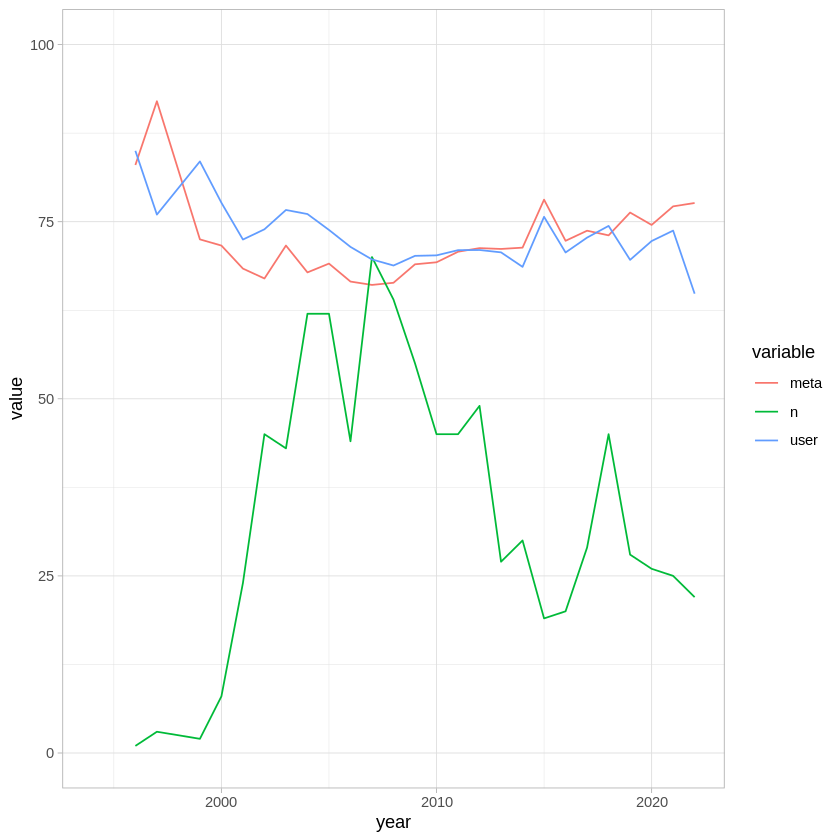

In [5]:
df %>% filter(genre=='Miscellaneous') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T),n=n()) %>% 
pivot_longer(!c(genre,year),names_to = 'variable',values_to = 'value') %>%
ggplot(aes(x = year, y = value, color = variable)) + geom_line() + theme_light() +
coord_cartesian(xlim = c(1994, 2022), ylim = c(0, 100))

`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.

Warning message:
“Removed 3 row(s) containing missing values (geom_path).”


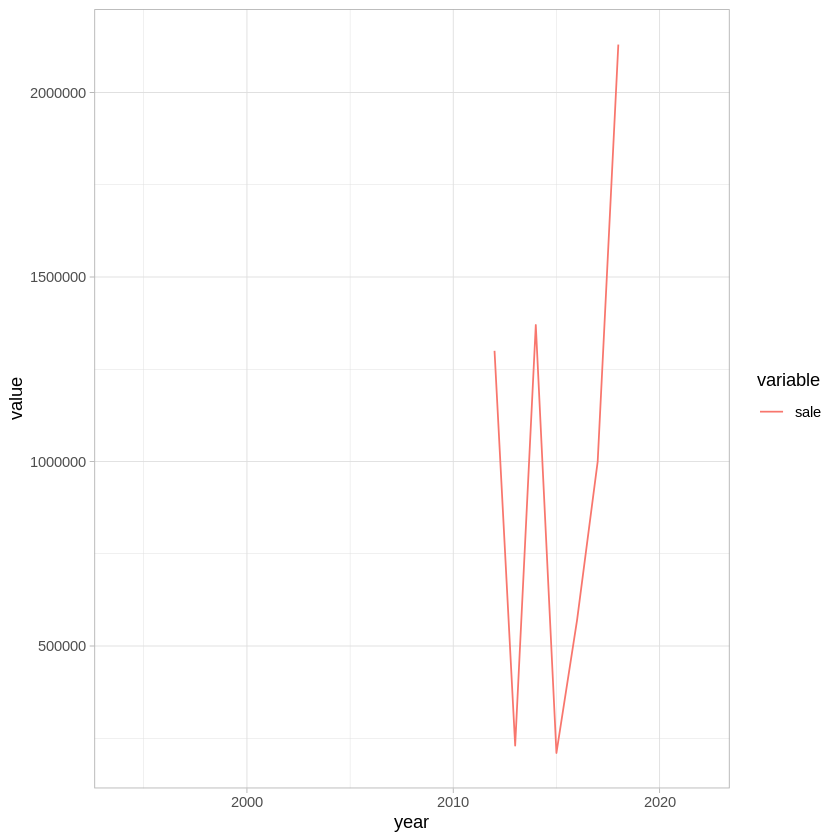

In [6]:
df %>% filter(genre=='Puzzle') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(sale = mean(sales,na.rm=T)) %>% 
pivot_longer(!c(genre,year),names_to = 'variable',values_to = 'value') %>%
ggplot(aes(x = year, y = value, color = variable)) + geom_line() + theme_light() +
coord_cartesian(xlim = c(1994, 2022))

In [12]:
dfmis <- df %>% filter(genre=='Miscellaneous') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T),n=n(),sale=mean(sales,na.rm=T))

`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



In [13]:
dfdr <- df %>% filter(genre=='Driving') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T),n=n(),var=sd(metascore))

`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



In [7]:
dfnum <- df %>% mutate(year=year(release_date)) %>%
group_by(year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T),n=n(),var=sd(metascore))

`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



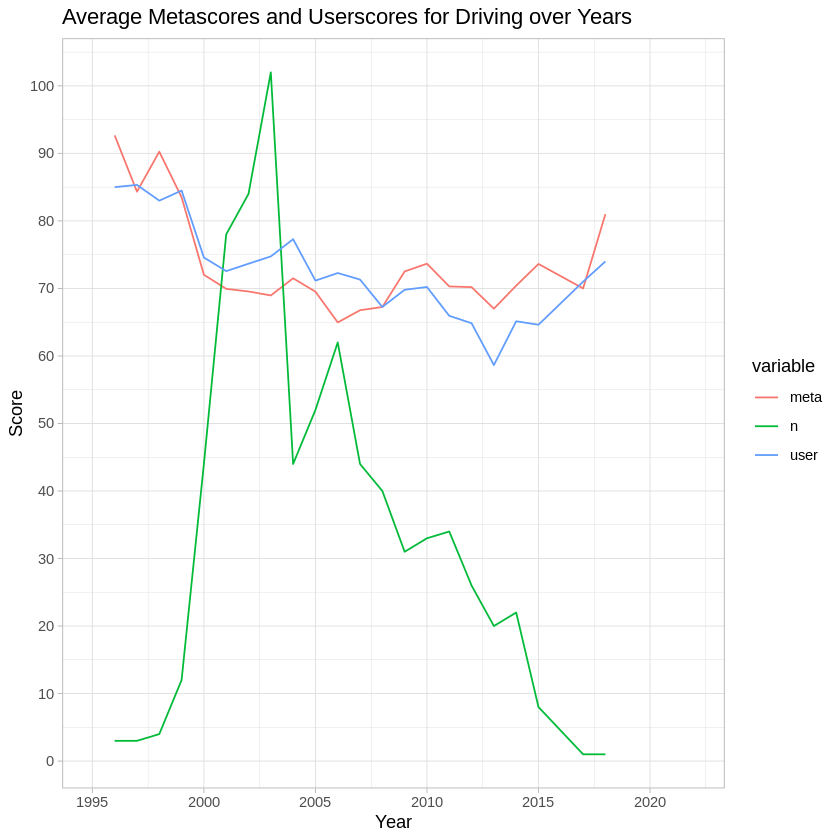

In [16]:
df %>% filter(genre=='Driving') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T), n=n()) %>% 
pivot_longer(!c(genre,year),names_to = 'variable',values_to = 'value') %>%
ggplot(aes(x = year, y = value, color = variable)) + geom_line() + theme_light() +
coord_cartesian(xlim = c(1995, 2022)) +
labs(
    title = "Average Metascores and Userscores for Driving over Years",
    x = 'Year',
    y = 'Score') +
scale_y_continuous(breaks = seq(0,100,by=10)) +
scale_x_continuous(breaks = seq(1995, 2020, by = 5))

`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



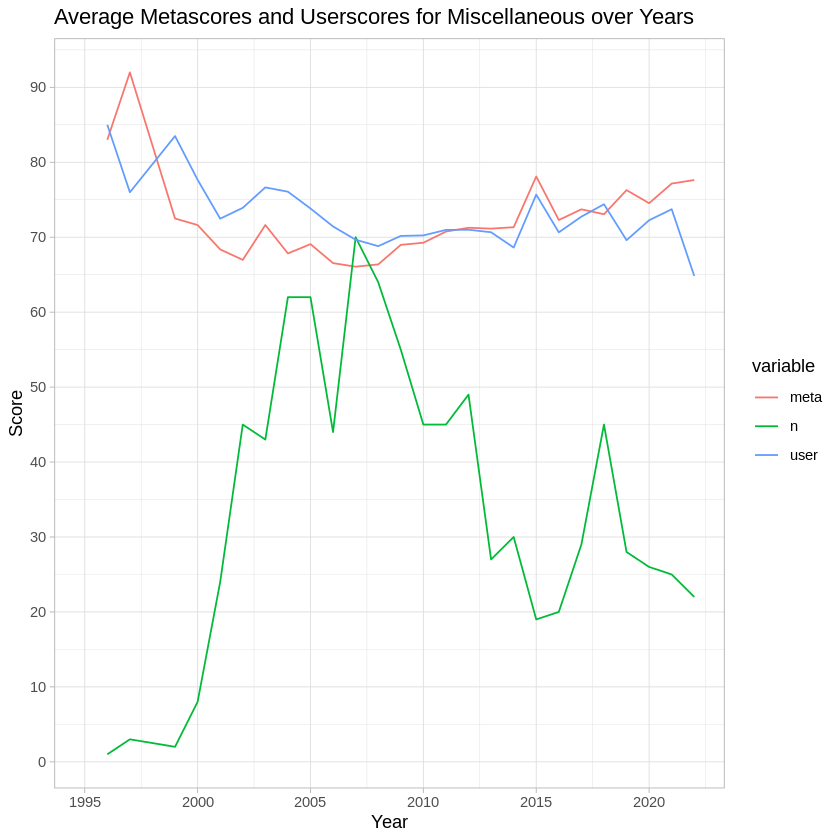

In [5]:
df %>% filter(genre=='Miscellaneous') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T), n=n()) %>% 
pivot_longer(!c(genre,year),names_to = 'variable',values_to = 'value') %>%
ggplot(aes(x = year, y = value, color = variable)) + geom_line() + theme_light() +
coord_cartesian(xlim = c(1995, 2022)) +
labs(
    title = "Average Metascores and Userscores for Miscellaneous over Years",
    x = 'Year',
    y = 'Score') +
scale_y_continuous(breaks = seq(0,100,by=10)) +
scale_x_continuous(breaks = seq(1995, 2020, by = 5))

`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



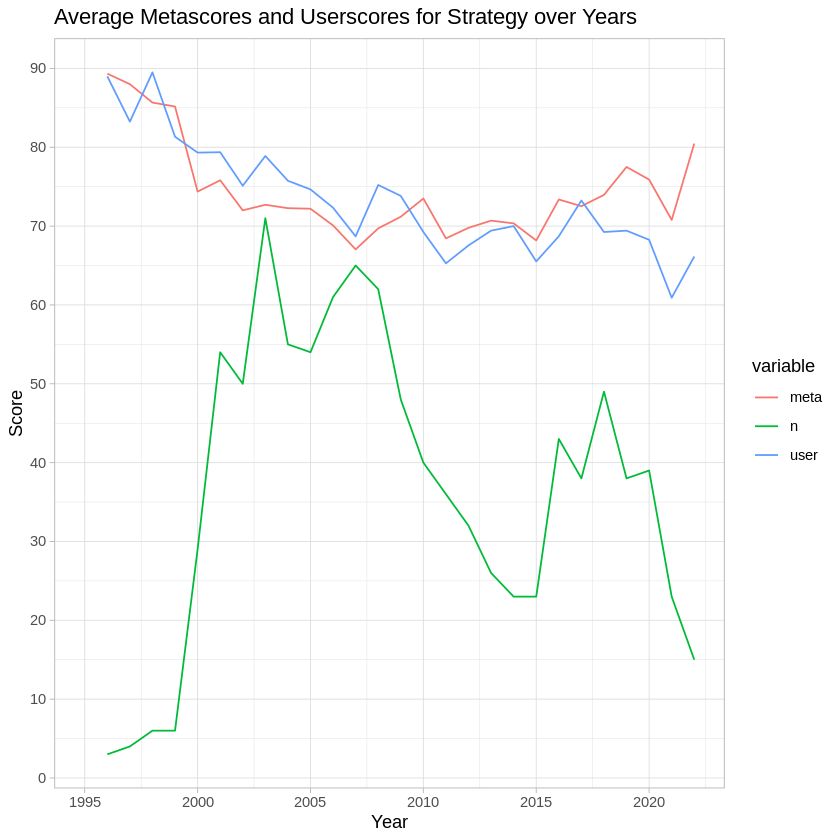

In [6]:
df %>% filter(genre=='Strategy') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T), n=n()) %>% 
pivot_longer(!c(genre,year),names_to = 'variable',values_to = 'value') %>%
ggplot(aes(x = year, y = value, color = variable)) + geom_line() + theme_light() +
coord_cartesian(xlim = c(1995, 2022)) +
labs(
    title = "Average Metascores and Userscores for Strategy over Years",
    x = 'Year',
    y = 'Score') +
scale_y_continuous(breaks = seq(0,100,by=10)) +
scale_x_continuous(breaks = seq(1995, 2020, by = 5))

`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



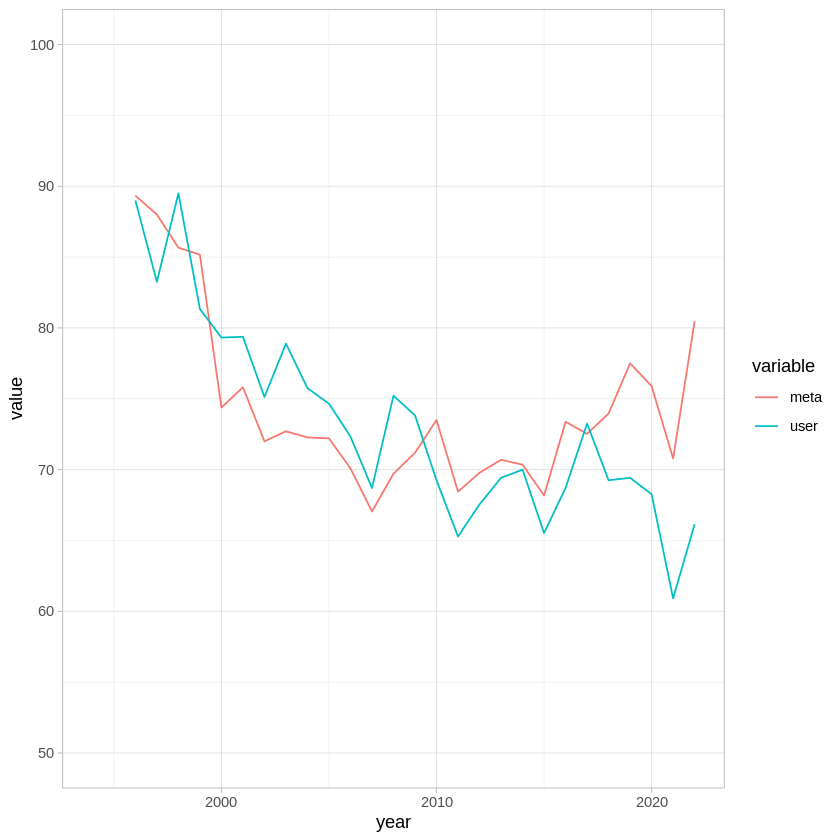

In [10]:
df %>% filter(genre=='Strategy') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T)) %>% 
pivot_longer(!c(genre,year),names_to = 'variable',values_to = 'value') %>%
ggplot(aes(x = year, y = value, color = variable)) + geom_line() + theme_light() +
coord_cartesian(xlim = c(1994, 2022), ylim = c(50, 100))

In [17]:
dfstr <- df %>% filter(genre=='Strategy') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T),n=n())

`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



In [18]:
reg <- lm(formula = user ~ n, data = dfstr)
summary(reg)


Call:
lm(formula = user ~ n, data = dfstr)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6522  -4.7018   0.0502   4.7160  13.3797 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 76.66910    2.89453  26.488   <2e-16 ***
n           -0.09147    0.06975  -1.311    0.202    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.967 on 25 degrees of freedom
Multiple R-squared:  0.06437,	Adjusted R-squared:  0.02694 
F-statistic:  1.72 on 1 and 25 DF,  p-value: 0.2016


In [19]:
reg <- lm(formula = meta ~ n, data = dfstr)
summary(reg)


Call:
lm(formula = meta ~ n, data = dfstr)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2364 -1.7257  0.5887  2.6765  7.6721 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 82.29888    1.89120  43.517  < 2e-16 ***
n           -0.21255    0.04557  -4.664  8.9e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.552 on 25 degrees of freedom
Multiple R-squared:  0.4653,	Adjusted R-squared:  0.4439 
F-statistic: 21.75 on 1 and 25 DF,  p-value: 8.905e-05


`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



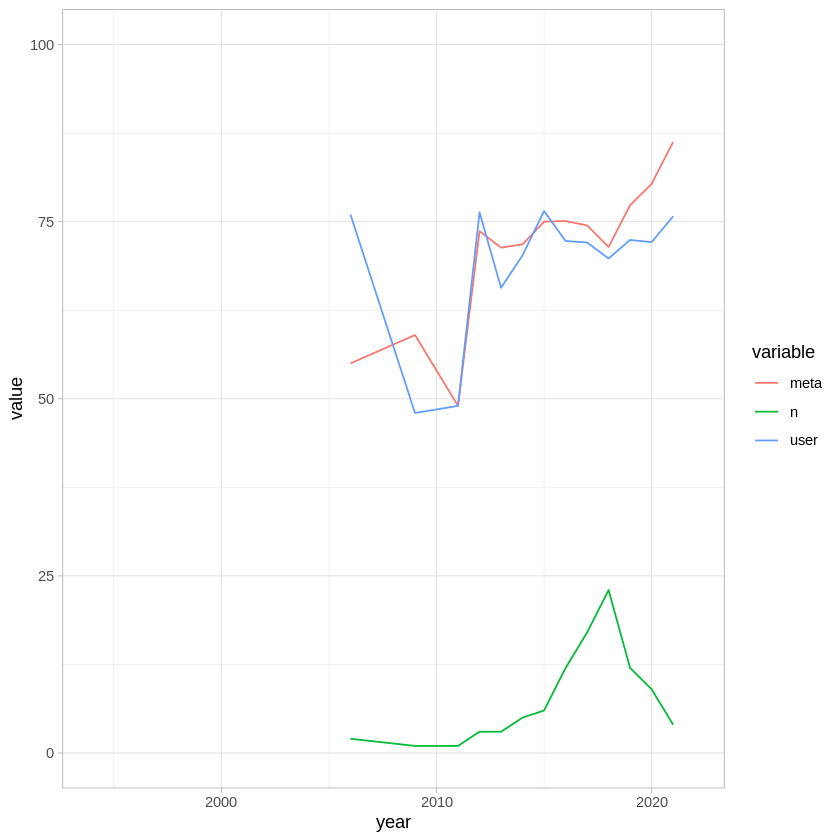

In [14]:
df %>% filter(genre=='Puzzle') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T),n=n()) %>% 
pivot_longer(!c(genre,year),names_to = 'variable',values_to = 'value') %>%
ggplot(aes(x = year, y = value, color = variable)) + geom_line() + theme_light() +
coord_cartesian(xlim = c(1994, 2022), ylim = c(0, 100))

`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.

Warning message:
“Removed 3 row(s) containing missing values (geom_path).”


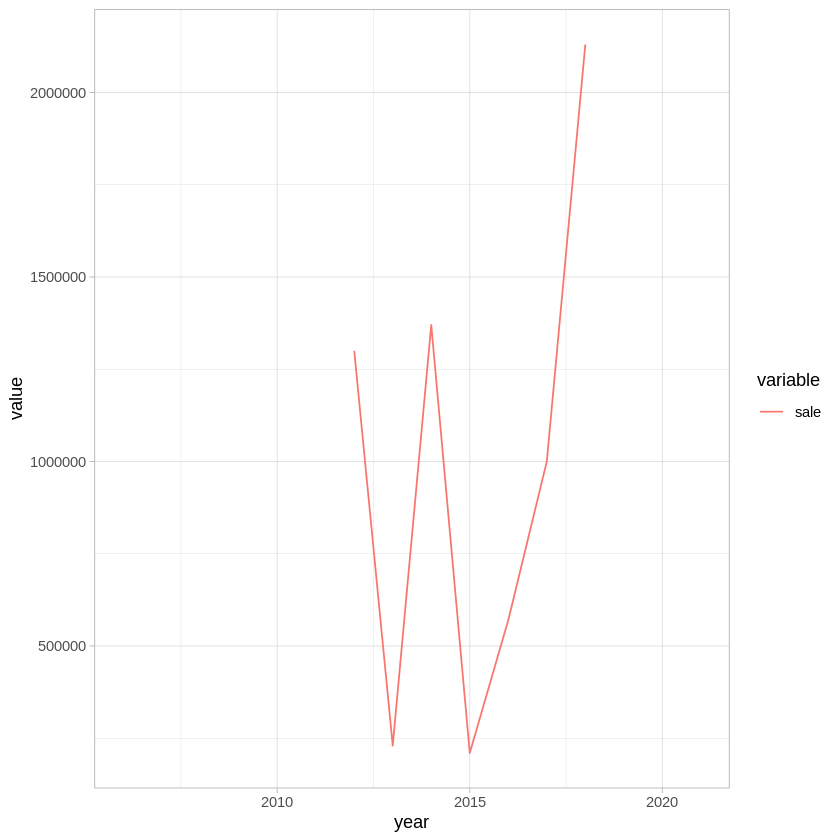

In [15]:
df %>% filter(genre=='Puzzle') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(sale=mean(sales,na.rm=T)) %>% 
pivot_longer(!c(genre,year),names_to = 'variable',values_to = 'value') %>%
ggplot(aes(x = year, y = value, color = variable)) + geom_line() + theme_light()

In [16]:
dfpz <- df %>% filter(genre=='Puzzle') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T),n=n(),var=sd(metascore),sale=mean(sales,na.rm=T))

`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



In [17]:
reg <- lm(formula = meta ~ n, data = dfpz)
summary(reg)


Call:
lm(formula = meta ~ n, data = dfpz)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.760  -7.760   2.601   5.191  17.661 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  66.1508     4.2310  15.635 7.36e-09 ***
n             0.6096     0.4251   1.434    0.179    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.962 on 11 degrees of freedom
Multiple R-squared:  0.1575,	Adjusted R-squared:  0.08096 
F-statistic: 2.057 on 1 and 11 DF,  p-value: 0.1793


In [18]:
df %>% mutate(year=year(release_date)) %>% group_by(genre,year) %>%
summarize(meta = mean(metascore,na.rm=T)) %>% ungroup() %>% 
arrange(-year) %>% group_by(genre) %>% summarize(diff = first(meta)-last(meta)) %>% arrange(-diff) %>% head(2)

`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



genre,diff
<chr>,<dbl>
Puzzle,31.25
Arcade,31.00


Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


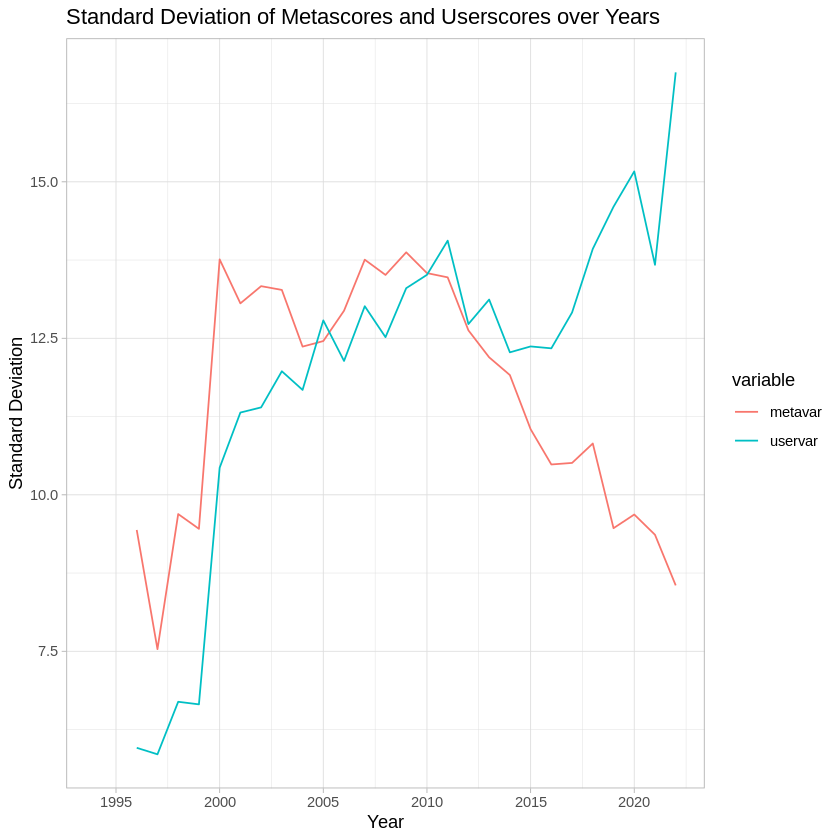

In [17]:
df %>% mutate(year=year(release_date)) %>% group_by(year) %>% summarize(metavar = sd(metascore,na.rm=T), uservar=sd(userscore,na.rm=T)) %>% 
pivot_longer(!year,names_to = 'variable',values_to = 'value') %>%
ggplot(aes(x = year, y = value, color = variable)) + geom_line() + theme_light() +
coord_cartesian(xlim = c(1994, 2022)) +
labs(
    title = "Standard Deviation of Metascores and Userscores over Years",
    x = 'Year',
    y = 'Standard Deviation') +
scale_x_continuous(breaks = seq(1995, 2020, by = 5))

In [20]:
count(df,genre) %>% arrange(-n) %>% head(3)

genre,n
<chr>,<int>
Action,4404
Action Adventure,1786
Role-Playing,1396


`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



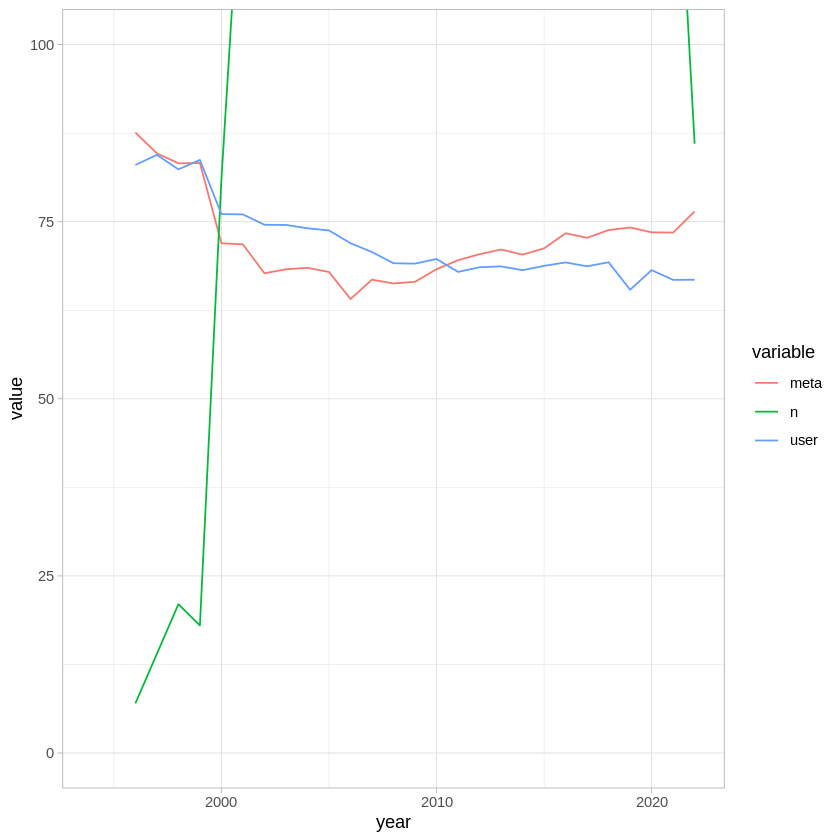

In [21]:
df %>% filter(genre=='Action') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T),n=n()) %>% 
pivot_longer(!c(genre,year),names_to = 'variable',values_to = 'value') %>%
ggplot(aes(x = year, y = value, color = variable)) + geom_line() + theme_light() +
coord_cartesian(xlim = c(1994, 2022), ylim = c(0, 100))

`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


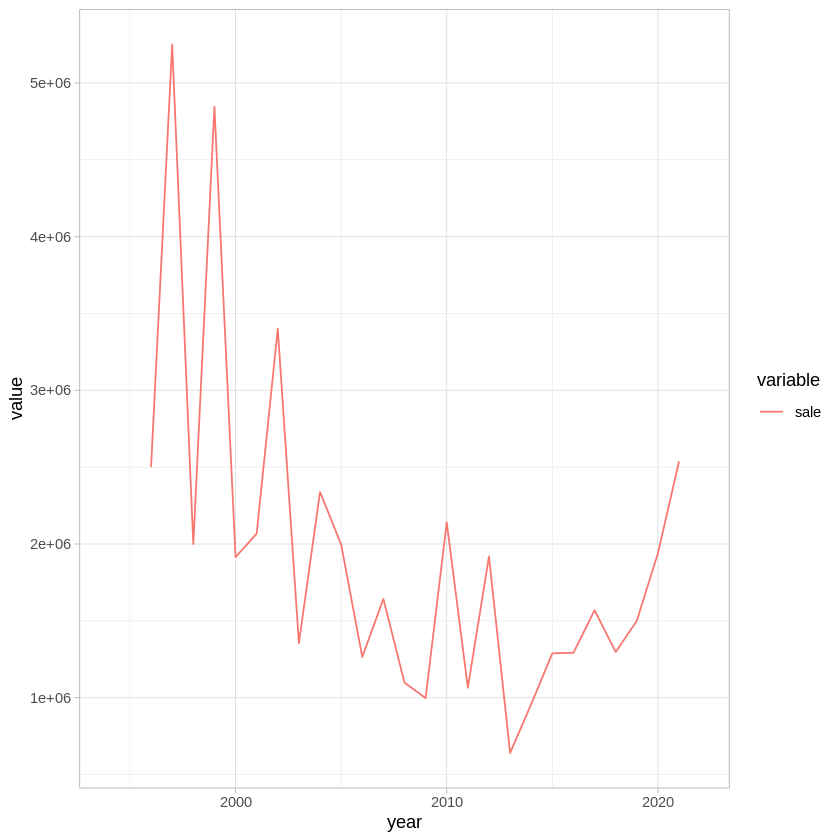

In [22]:
df %>% filter(genre=='Role-Playing') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(sale=mean(sales,na.rm=T)) %>% 
pivot_longer(!c(genre,year),names_to = 'variable',values_to = 'value') %>%
ggplot(aes(x = year, y = value, color = variable)) + geom_line() + theme_light() +
coord_cartesian(xlim = c(1994, 2022))

In [23]:
dfac <- df %>% filter(genre=='Action') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T),n=n(),sale=mean(sales,na.rm=T))

`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



In [24]:
reg <- lm(formula = sale ~ user, data = dfac)
summary(reg)


Call:
lm(formula = sale ~ user, data = dfac)

Residuals:
     Min       1Q   Median       3Q      Max 
-2651179 -1329607   328568   693449  6896633 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -10441353    4752134  -2.197  0.03749 * 
user           186201      65626   2.837  0.00889 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1856000 on 25 degrees of freedom
Multiple R-squared:  0.2436,	Adjusted R-squared:  0.2133 
F-statistic:  8.05 on 1 and 25 DF,  p-value: 0.008894


`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



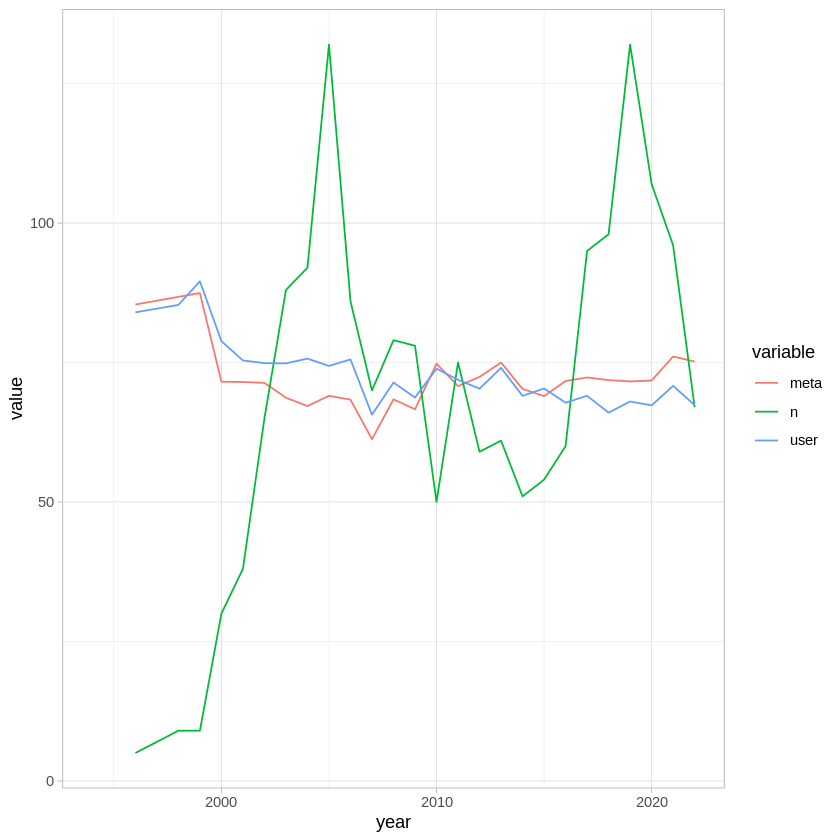

In [25]:
df %>% filter(genre=='Action Adventure') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(meta=mean(metascore), user=mean(userscore,na.rm=T),n=n()) %>% 
pivot_longer(!c(genre,year),names_to = 'variable',values_to = 'value') %>%
ggplot(aes(x = year, y = value, color = variable)) + geom_line() + theme_light() +
coord_cartesian(xlim = c(1994, 2022))

In [26]:
dfaa <- df %>% filter(genre=='Action Adventure') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T),n=n(),sale=mean(sales,na.rm=T))

`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



In [27]:
reg <- lm(formula = user~n, data = dfaa)
summary(reg)


Call:
lm(formula = user ~ n, data = dfaa)

Residuals:
   Min     1Q Median     3Q    Max 
-7.285 -3.513 -0.443  3.141  9.412 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 81.20885    2.10026  38.666  < 2e-16 ***
n           -0.11832    0.02759  -4.288 0.000254 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.615 on 24 degrees of freedom
Multiple R-squared:  0.4338,	Adjusted R-squared:  0.4102 
F-statistic: 18.39 on 1 and 24 DF,  p-value: 0.0002537


`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



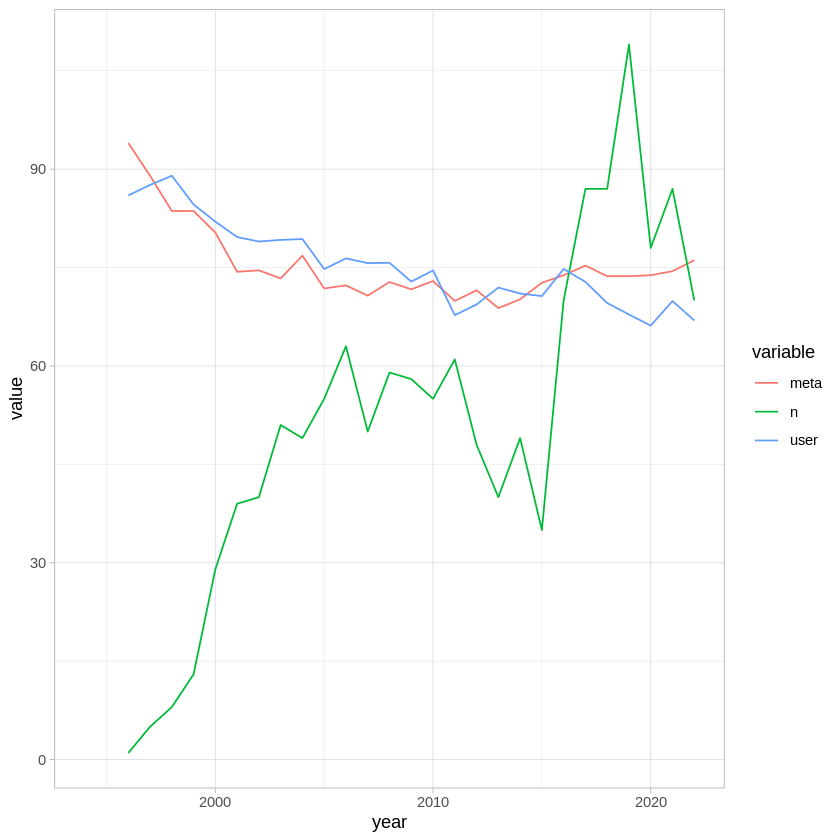

In [28]:
df %>% filter(genre=='Role-Playing') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T),n=n()) %>% 
pivot_longer(!c(genre,year),names_to = 'variable',values_to = 'value') %>%
ggplot(aes(x = year, y = value, color = variable)) + geom_line() + theme_light() +
coord_cartesian(xlim = c(1994, 2022))

`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


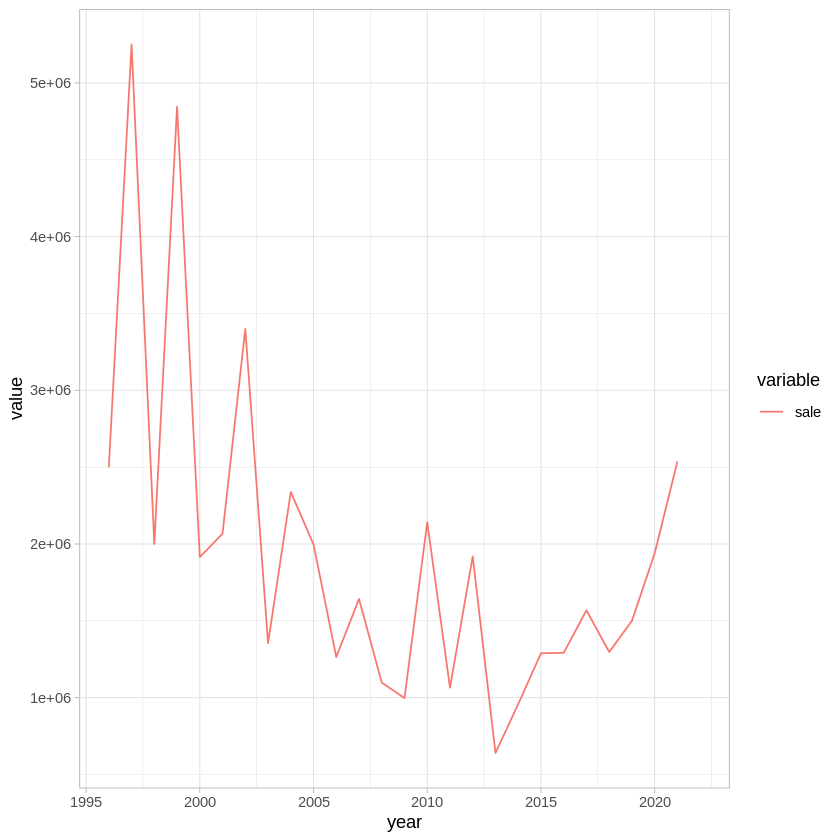

In [29]:
df %>% filter(genre=='Role-Playing') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(sale=mean(sales,na.rm=T)) %>% 
pivot_longer(!c(genre,year),names_to = 'variable',values_to = 'value') %>%
ggplot(aes(x = year, y = value, color = variable)) + geom_line() + theme_light()

In [30]:
dfaa <- df %>% filter(genre=='Role-Playing') %>% mutate(year=year(release_date)) %>%
group_by(genre, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T),n=n(),sale=mean(sales,na.rm=T))

`summarise()` has grouped output by 'genre'. You can override using the `.groups` argument.



In [31]:
reg <- lm(formula = sale~user, data = dfaa)
summary(reg)


Call:
lm(formula = sale ~ user, data = dfaa)

Residuals:
     Min       1Q   Median       3Q      Max 
-1327779  -639699  -115993   344318  2066821 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -5864624    2144524  -2.735  0.01155 * 
user          103285      28233   3.658  0.00124 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 894500 on 24 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.358,	Adjusted R-squared:  0.3313 
F-statistic: 13.38 on 1 and 24 DF,  p-value: 0.001243


In [32]:
df %>% mutate(year=year(release_date)) %>% filter(year<=2000) %>% 
group_by(developer) %>% summarize(meta=mean(metascore,na.rm=T),user=mean(userscore,na.rm=T),n=n()) %>% filter(n>=2) %>%
arrange(-user) %>% head(5)

developer,meta,user,n
<chr>,<dbl>,<dbl>,<int>
Naughty Dog,89.50,90.00000,4
Looking Glass Studios,89.50,89.50000,2
Insomniac Games,91.00,89.00000,2
SquareSoft,86.50,88.77273,22
Black Isle Studios,88.25,88.50000,4


`summarise()` has grouped output by 'developer'. You can override using the `.groups` argument.



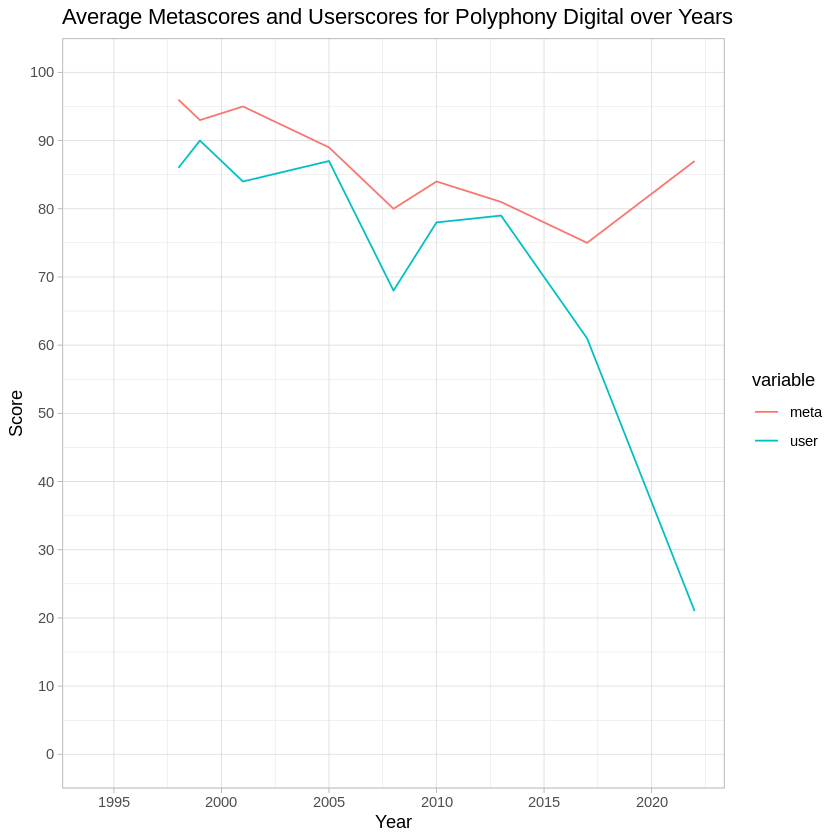

In [19]:
df %>% filter(developer=='Polyphony Digital') %>% mutate(year=year(release_date)) %>%
group_by(developer, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T)) %>% 
pivot_longer(!c(developer,year),names_to = 'variable',values_to = 'value') %>%
ggplot(aes(x = year, y = value, color = variable)) + geom_line() + theme_light() + 
coord_cartesian(xlim = c(1994, 2022), ylim = c(0, 100)) +
labs(
    title = "Average Metascores and Userscores for Polyphony Digital over Years",
    x = 'Year',
    y = 'Score') +
scale_y_continuous(breaks = seq(0,100,by=10)) +
scale_x_continuous(breaks = seq(1995, 2020, by = 5))

`summarise()` has grouped output by 'developer'. You can override using the `.groups` argument.



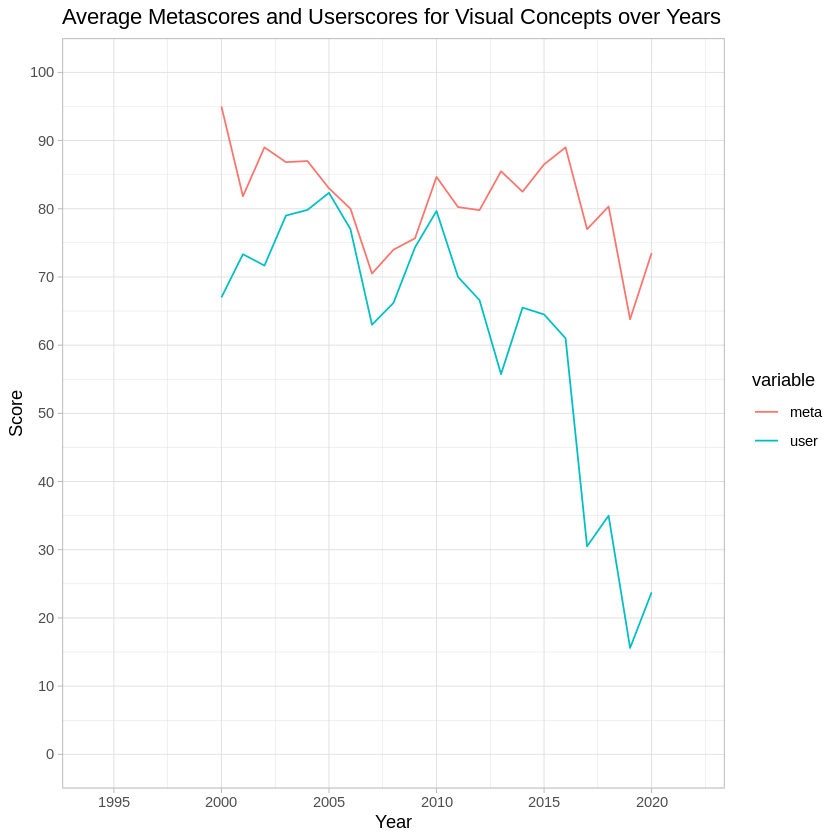

In [20]:
df %>% filter(developer=='Visual Concepts') %>% mutate(year=year(release_date)) %>%
group_by(developer, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T)) %>% 
pivot_longer(!c(developer,year),names_to = 'variable',values_to = 'value') %>%
ggplot(aes(x = year, y = value, color = variable)) + geom_line() + theme_light() + 
coord_cartesian(xlim = c(1994, 2022), ylim = c(0, 100)) +
labs(
    title = "Average Metascores and Userscores for Visual Concepts over Years",
    x = 'Year',
    y = 'Score') +
scale_y_continuous(breaks = seq(0,100,by=10)) +
scale_x_continuous(breaks = seq(1995, 2020, by = 5))

In [53]:
reg <- lm(formula = sales~num_critic_reviews, data = df)
summary(reg)


Call:
lm(formula = sales ~ num_critic_reviews, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-6226611 -1664403  -748020   115286 79879006 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          131698     225777   0.583     0.56    
num_critic_reviews    56653       4862  11.652   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4628000 on 1341 degrees of freedom
  (12462 observations deleted due to missingness)
Multiple R-squared:  0.09193,	Adjusted R-squared:  0.09126 
F-statistic: 135.8 on 1 and 1341 DF,  p-value: < 2.2e-16


In [36]:
dfpd <- df %>% filter(developer=='Polyphony Digital') %>% mutate(year=year(release_date)) %>%
group_by(developer, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T),n=n(),diff=meta-user)

`summarise()` has grouped output by 'developer'. You can override using the `.groups` argument.



In [37]:
reg <- lm(formula = diff~year, data = dfpd)
summary(reg)


Call:
lm(formula = diff ~ year, data = dfpd)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.608 -10.940  -1.827   8.067  30.385 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -3111.1843  1412.1811  -2.203   0.0634 .
year            1.5563     0.7032   2.213   0.0625 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.42 on 7 degrees of freedom
Multiple R-squared:  0.4116,	Adjusted R-squared:  0.3276 
F-statistic: 4.898 on 1 and 7 DF,  p-value: 0.06252


In [38]:
dfvc <- df %>% filter(developer=='Visual Concepts') %>% mutate(year=year(release_date)) %>%
group_by(developer, year) %>% summarize(meta = mean(metascore),user=mean(userscore,na.rm=T),n=n(),diff=meta-user)
reg <- lm(formula = diff~year, data = dfvc)
summary(reg)

`summarise()` has grouped output by 'developer'. You can override using the `.groups` argument.




Call:
lm(formula = diff ~ year, data = dfvc)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.035  -9.203  -2.493  11.091  27.504 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3749.1148   859.7423  -4.361 0.000336 ***
year            1.8748     0.4277   4.383 0.000320 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.87 on 19 degrees of freedom
Multiple R-squared:  0.5028,	Adjusted R-squared:  0.4766 
F-statistic: 19.21 on 1 and 19 DF,  p-value: 0.0003197
